<a href="https://colab.research.google.com/github/sarathchandranm2001/DataAnalysis/blob/main/Alcohol_consumption_orgi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np#for numerical computation
import pandas as pd#for handling data set
import matplotlib.pyplot as plt #plotting graph
from sklearn.model_selection import train_test_split #for splitting data into
from sklearn.linear_model import LinearRegression #for creatinng lenair
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns  #evaluating the model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
#Load the dataset
#Load the dataset
file_path='/content/drive/MyDrive/stats_survey_org.csv' # Changed path to include MyDrive

In [41]:
data=pd.read_csv(file_path)
data.head()

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,4500,No,8,Only weekends,8,3.0,0.0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,7500,"Yes (NSFAS, etc...)",8,Only weekends,3-5,4.0,0.0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,4500,No,3-5,2,8,3.0,0.0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8,2.0,0.0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,4500,No,3-5,Only weekends,5-8,1.0,3.0,No,Yes,Fair


In [42]:
print(data.isnull().sum())
data.info()

Timestamp                                                                                             0
Your Sex?                                                                                             2
Your Matric (grade 12) Average/ GPA (in %)                                                            7
What year were you in last year (2023) ?                                                             73
What faculty does your degree fall under?                                                             7
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   86
Your Accommodation Status Last Year (2023)                                                           23
Monthly Allowance in 2023                                                                            31
Were you on scholarship/bursary in 2023?                                                              8
Additional amount of studying (in hrs) per week                 

In [43]:
# Impute missing values in categorical columns using mode
data['Your Sex?'] = data['Your Sex?'].fillna(data['Your Sex?'].mode()[0])
data['What faculty does your degree fall under?'] = data['What faculty does your degree fall under?'].fillna(data['What faculty does your degree fall under?'].mode()[0])
data['Were you on scholarship/bursary in 2023?'] = data['Were you on scholarship/bursary in 2023?'].fillna(data['Were you on scholarship/bursary in 2023?'].mode()[0])
data['Your Accommodation Status Last Year (2023)'] = data['Your Accommodation Status Last Year (2023)'].fillna(data['Your Accommodation Status Last Year (2023)'].mode()[0])
data['Do your parents approve alcohol consumption?'] = data['Do your parents approve alcohol consumption?'].fillna(data['Do your parents approve alcohol consumption?'].mode()[0])
data['Are you currently in a romantic relationship?'] = data['Are you currently in a romantic relationship?'].fillna(data['Are you currently in a romantic relationship?'].mode()[0])
data['How strong is your relationship with your parent/s?'] = data['How strong is your relationship with your parent/s?'].fillna(data['How strong is your relationship with your parent/s?'].mode()[0])
data['What year were you in last year (2023) ?']=data['What year were you in last year (2023) ?'].fillna(data['What year were you in last year (2023) ?'].mode()[0])
data['Monthly Allowance in 2023']=data['Monthly Allowance in 2023'].fillna(data['Monthly Allowance in 2023'].mode()[0])



In [50]:
# Impute missing values in categorical columns using median

data['Your Matric (grade 12) Average/ GPA (in %)'] = data['Your Matric (grade 12) Average/ GPA (in %)'].fillna(data['Your Matric (grade 12) Average/ GPA (in %)'].mean())
data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'] = data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'].fillna(data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'].mean())


In [51]:
print(data.isnull().sum())
data.info()

Timestamp                                                                                            0
Your Sex?                                                                                            0
Your Matric (grade 12) Average/ GPA (in %)                                                           0
What year were you in last year (2023) ?                                                             0
What faculty does your degree fall under?                                                            0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   0
Your Accommodation Status Last Year (2023)                                                           0
Monthly Allowance in 2023                                                                            0
Were you on scholarship/bursary in 2023?                                                             0
Additional amount of studying (in hrs) per week                          

In [52]:
# Drop any rows that still have missing values after imputation
data_cleaned = data.dropna()
print("Data after handling missing values:")
print(data_cleaned.info())

Data after handling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          401 non-null    object 
 1   Your Sex?                                                                                          401 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         401 non-null    float64
 3   What year were you in last year (2023) ?                                                           401 non-null    object 
 4   What faculty does your degree fall under?                                                  

In [53]:
# Summary statistics for numerical columns
print(data.describe())

# Frequency counts for categorical columns
print(data['Your Sex?'].value_counts())


       Your Matric (grade 12) Average/ GPA (in %)  \
count                                  406.000000   
mean                                    77.989724   
std                                      6.987439   
min                                     34.000000   
25%                                     74.000000   
50%                                     78.000000   
75%                                     83.000000   
max                                     99.000000   

       Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)  \
count                                         406.000000                                    
mean                                           66.268469                                    
std                                             8.118757                                    
min                                            30.000000                                    
25%                                            61.000000 

In [54]:
data.columns

Index(['Timestamp', 'Your Sex?', 'Your Matric (grade 12) Average/ GPA (in %)',
       'What year were you in last year (2023) ?',
       'What faculty does your degree fall under?',
       'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
       'Your Accommodation Status Last Year (2023)',
       'Monthly Allowance in 2023', 'Were you on scholarship/bursary in 2023?',
       'Additional amount of studying (in hrs) per week',
       'How often do you go out partying/socialising during the week? ',
       'On a night out, how many alcoholic drinks do you consume?',
       'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
       'How many modules have you failed thus far into your studies?',
       'Are you currently in a romantic relationship?',
       'Do your parents approve alcohol consumption?',
       'How strong is your relationship with your parent/s?'],
      dtype='object')

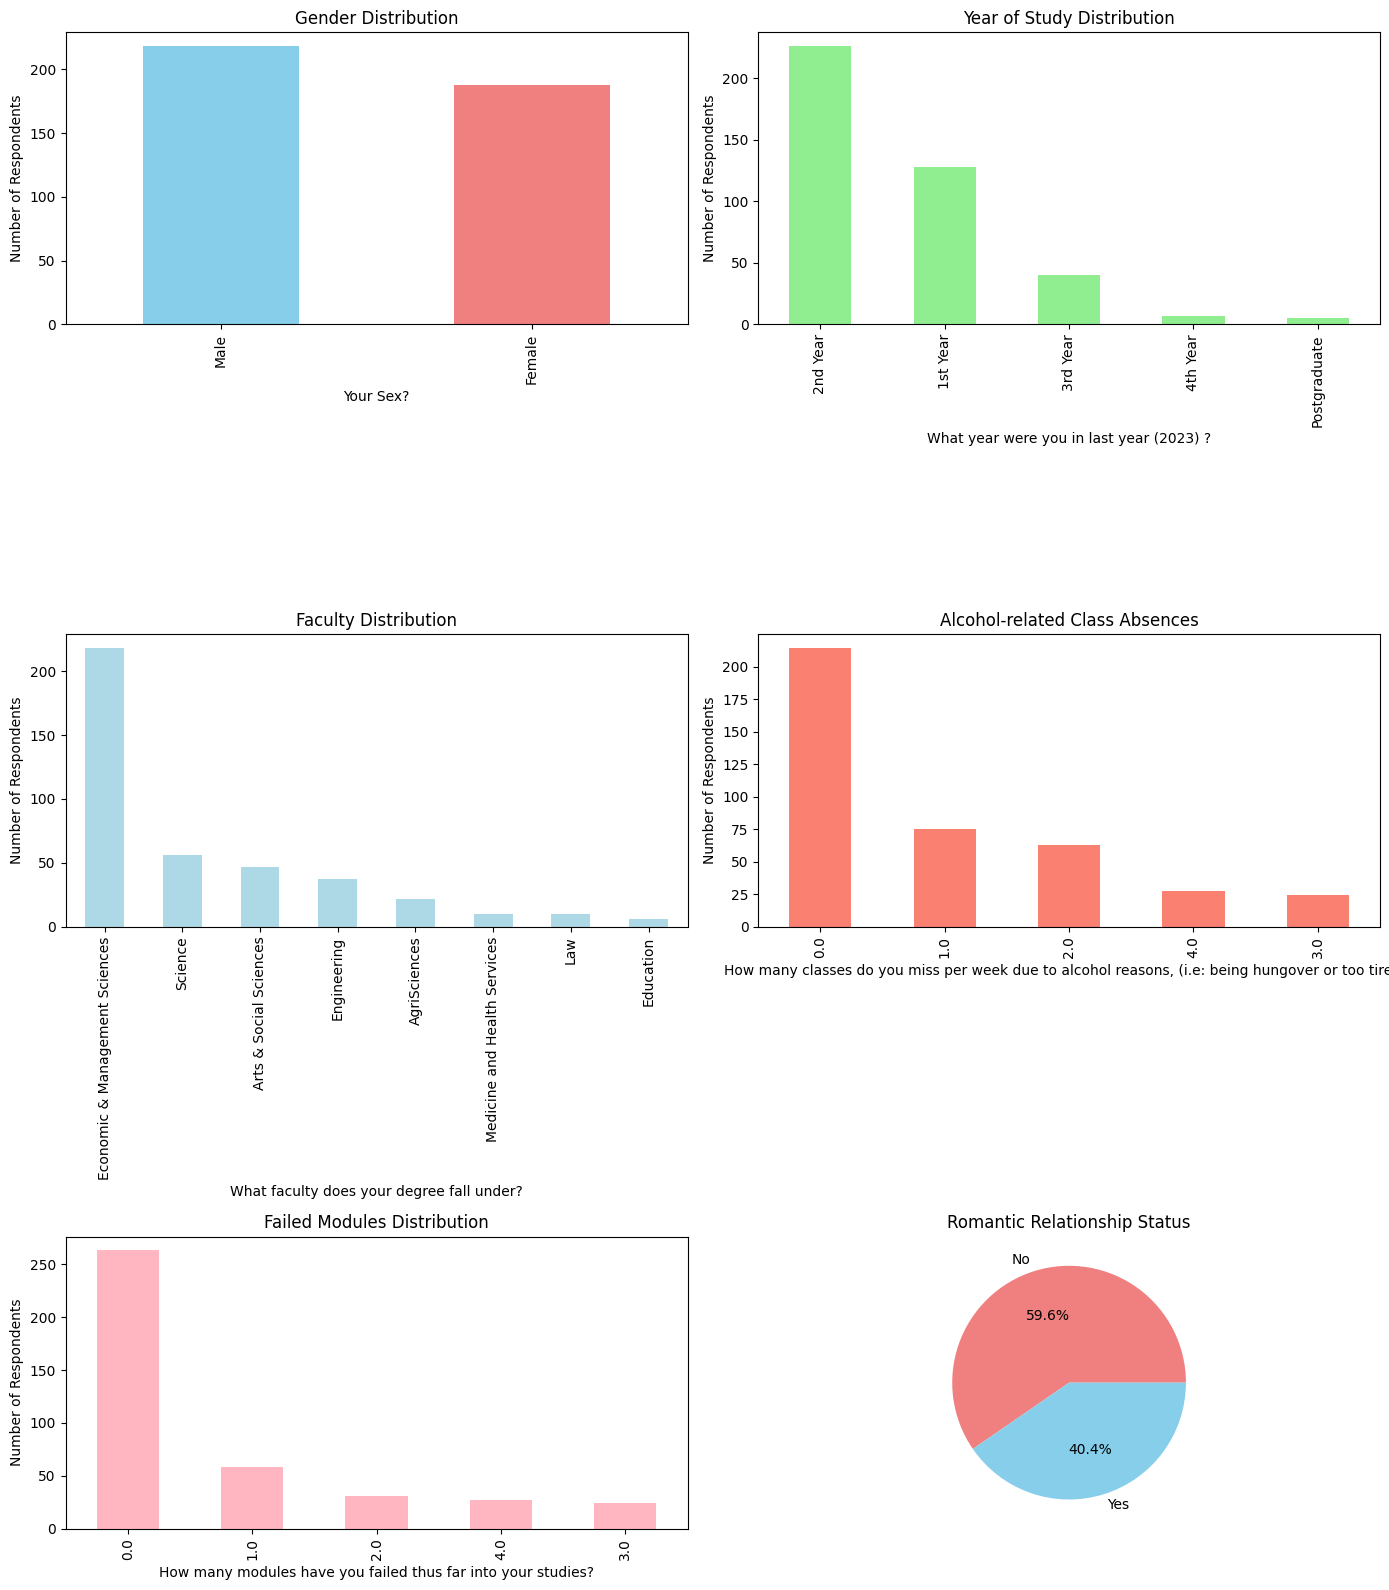

In [55]:
import matplotlib.pyplot as plt

# Setting up subplots for multiple charts
fig, axes = plt.subplots(3, 2, figsize=(14, 16))

# Calculate value counts for categorical columns
gender_distribution = data['Your Sex?'].value_counts()
year_of_study_distribution = data['What year were you in last year (2023) ?'].value_counts()
faculty_distribution = data['What faculty does your degree fall under?'].value_counts()
alcohol_absences_distribution = data['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'].value_counts()
failed_modules_distribution = data['How many modules have you failed thus far into your studies?'].value_counts()
relationship_status_distribution = data['Are you currently in a romantic relationship?'].value_counts()

# Gender Distribution (Bar chart)
gender_distribution.plot(kind='bar', ax=axes[0, 0], color=['skyblue', 'lightcoral'], title="Gender Distribution")
axes[0, 0].set_ylabel("Number of Respondents")

# Year of Study Distribution (Bar chart)
year_of_study_distribution.plot(kind='bar', ax=axes[0, 1], color='lightgreen', title="Year of Study Distribution")
axes[0, 1].set_ylabel("Number of Respondents")

# Faculty Distribution (Bar chart)
faculty_distribution.plot(kind='bar', ax=axes[1, 0], color='lightblue', title="Faculty Distribution")
axes[1, 0].set_ylabel("Number of Respondents")

# Alcohol-related Class Absences (Bar chart)
alcohol_absences_distribution.plot(kind='bar', ax=axes[1, 1], color='salmon', title="Alcohol-related Class Absences")
axes[1, 1].set_ylabel("Number of Respondents")

# Failed Modules (Bar chart)
failed_modules_distribution.plot(kind='bar', ax=axes[2, 0], color='lightpink', title="Failed Modules Distribution")
axes[2, 0].set_ylabel("Number of Respondents")

# Romantic Relationship Status (Pie chart)
relationship_status_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axes[2, 1], colors=['lightcoral', 'skyblue'], title="Romantic Relationship Status")
axes[2, 1].set_ylabel('')

plt.tight_layout()
plt.show()


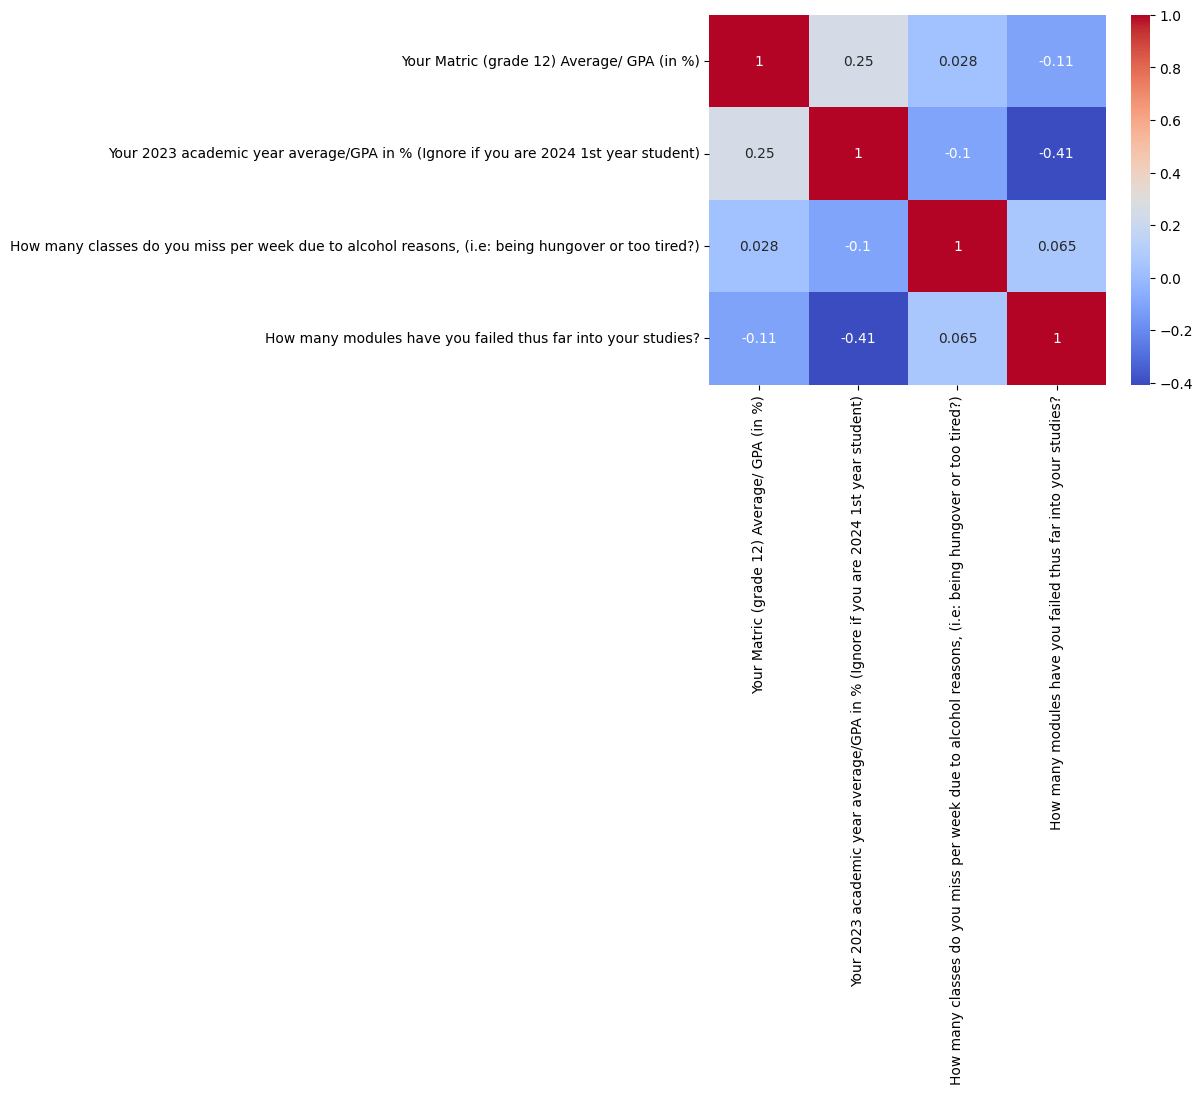

In [56]:
# Select only numeric columns
numerical_data = data.select_dtypes(include=['number'])

# Compute and visualize correlation matrix for numeric columns
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**INSIGHTS FROM HEAT MAP:**

1.The most noticeable correlations are between 2023 Academic Year GPA and Modules Failed (-0.41), indicating a moderate inverse relationship. Higher performing students in 2023 tend to fail fewer modules.
2.On the other hand, factors like missing classes for alcohol-related reasons seem to have almost no significant correlation with academic performance (as seen in the weak values of 0.028 and 0.065).
3.Overall, students who performed better in matric and in their 2023 academic year are slightly more likely to continue doing well in their studies, though the relationships are generally weak.







In [105]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define dependent and independent variables
X = data[['On a night out, how many alcoholic drinks do you consume?', 'Additional amount of studying (in hrs) per week']].copy()

# Convert 'On a night out, how many alcoholic drinks do you consume?' to numeric
def convert_to_numeric(value):
    if isinstance(value, str) and '-' in value:  # Check if the value is a string and contains '-'
        start, end = map(int, value.split('-'))
        return (start + end) / 2
    try:
        return float(value)
    except ValueError:
        return None  # Handle cases with invalid values

# Apply the conversion to the correct column using .loc[] to avoid SettingWithCopyWarning
X.loc[:, 'On a night out, how many alcoholic drinks do you consume?'] = X['On a night out, how many alcoholic drinks do you consume?'].apply(convert_to_numeric)

# Verify that the dependent variable column name matches
y = data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']

# Convert GPA to a binary class (e.g., 0 for GPA < 50, 1 for GPA >= 50)
# Adjust the threshold if necessary to ensure both classes are present
y = (y >= 50).astype(int)  # This creates a binary classification based on a 50% threshold

# Drop rows with NaN values after conversion for both X and y
X = X.dropna()
y = y.loc[X.index]  # Align y with X after dropping rows

# Ensure all values in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()  # Drop rows with NaN values that might result from the conversion
y = y.loc[X.index]  # Align y with X again after dropping NaN rows

# Remove any NaN values from y
y = y.dropna()
X = X.loc[y.index]  # Align X with y after dropping rows from y

# Ensure that X and y have the same number of rows
print(f"Length of X: {len(X)}, Length of y: {len(y)}")

# Fit the logistic regression model if lengths match
if len(X) == len(y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Check for class imbalance in the training set
    print(f"Unique values in y_train: {y_train.unique()}")

    # Check if y_train contains both classes
    if len(y_train.unique()) > 1:
        # Initialize Logistic Regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Print the coefficients of the model
        print('Coefficients:', model.coef_)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy:', accuracy)

        # Confusion Matrix
        conf

Length of X: 134, Length of y: 134
Unique values in y_train: [1]


In [149]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Assuming 'data' is your pandas DataFrame with all the relevant columns

# Check if all the columns are present in the DataFrame
required_columns = ['On a night out, how many alcoholic drinks do you consume?',
                    'Additional amount of studying (in hrs) per week',
                    'Monthly Allowance in 2023',
                    'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
                    'Are you currently in a romantic relationship?',
                    'How often do you go out partying/socialising during the week?']

missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Warning: The following required columns are missing from the data: {missing_columns}")
    # You can decide to either remove these columns or raise an error
    # For now, let's remove the missing columns from the list to proceed
    required_columns = [col for col in required_columns if col in data.columns]

# Define dependent and independent variables with available columns
X = data[required_columns].copy()

# Convert 'On a night out, how many alcoholic drinks do you consume?' to numeric
def convert_to_numeric(value):
    if isinstance(value, str) and '-' in value:  # Check if the value is a string and contains '-'
        start, end = map(int, value.split('-'))
        return (start + end) / 2
    try:
        return float(value)
    except ValueError:
        return None  # Handle cases with invalid values

# Apply the conversion to the correct column
if 'On a night out, how many alcoholic drinks do you consume?' in X.columns:
    X['On a night out, how many alcoholic drinks do you consume?'] = X['On a night out, how many alcoholic drinks do you consume?'].apply(convert_to_numeric)

# Convert categorical columns using LabelEncoder
label_encoder = LabelEncoder()

if 'Are you currently in a romantic relationship?' in X.columns:
    X['Are you currently in a romantic relationship?'] = label_encoder.fit_transform(X['Are you currently in a romantic relationship?'])

if 'How often do you go out partying/socialising during the week?' in X.columns:
    X['How often do you go out partying/socialising during the week?'] = label_encoder.fit_transform(X['How often do you go out partying/socialising during the week?'])

# Convert GPA into a binary class (e.g., 1 = High GPA (>=60%), 0 = Low GPA (<60%))
y = data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'].copy()
y = y.apply(lambda x: 1 if x >= 62 else 0)

# Drop rows with NaN values after conversion for both X and y
X = X.dropna()
y = y.loc[X.index]  # Align y with X after dropping rows

# Ensure all values in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()  # Drop rows with NaN values that might result from the conversion
y = y.loc[X.index]  # Align y with X again after dropping NaN rows

# Ensure that X and y have the same number of rows
print(f"Length of X: {len(X)}, Length of y: {len(y)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Example input for prediction (modify this based on the columns that exist in your data)
input_data = pd.DataFrame([[3, 6, 5500, 1, 1]], columns=[
    'On a night out, how many alcoholic drinks do you consume?',
    'Additional amount of studying (in hrs) per week',
    'Monthly Allowance in 2023',
    'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
    'Are you currently in a romantic relationship?'
])

# Predicting the probability of the student belonging to each class
predicted_probabilities = model.predict_proba(input_data)

# Predict the class (0 for low GPA, 1 for high GPA) directly
predicted_class = model.predict(input_data)

# Output the results
print('Predicted Probabilities:', predicted_probabilities)
print('Predicted Class (Low GPA=0, High GPA = 1):', predicted_class)


Length of X: 71, Length of y: 71
Accuracy: 0.7333333333333333
Precision: 0.7857142857142857
Recall: 0.9166666666666666
F1 Score: 0.8461538461538461
Confusion Matrix:
[[ 0  3]
 [ 1 11]]
Predicted Probabilities: [[0.22338123 0.77661877]]
Predicted Class (Low GPA=0, High GPA = 1): [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


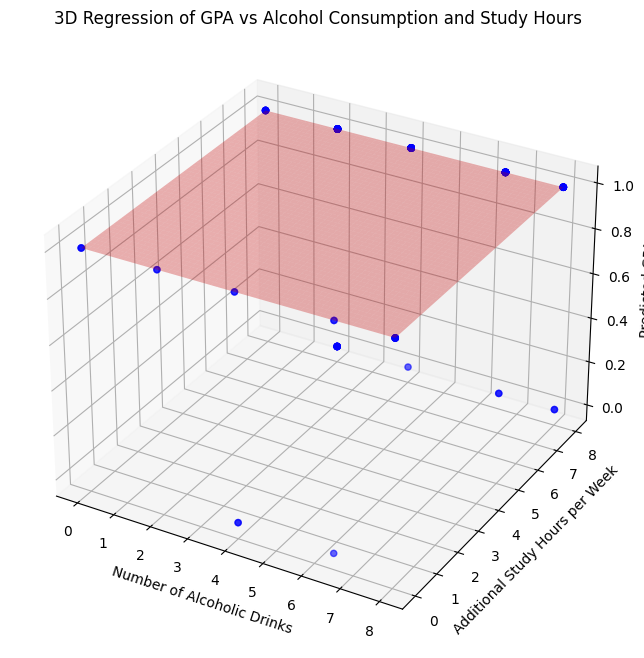

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X['On a night out, how many alcoholic drinks do you consume?'],
           X['Additional amount of studying (in hrs) per week'],
           y, c='blue', marker='o', alpha=0.6, label='Actual Data')

# Create a grid for plotting the regression plane
x_surf, y_surf = np.meshgrid(np.linspace(X['On a night out, how many alcoholic drinks do you consume?'].min(),
                                         X['On a night out, how many alcoholic drinks do you consume?'].max(), 100),
                             np.linspace(X['Additional amount of studying (in hrs) per week'].min(),
                                         X['Additional amount of studying (in hrs) per week'].max(), 100))
# Flatten the grid and combine into a single array for predictions
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()])

# Reshape the predictions to match the grid shape
z_surf = z_surf.reshape(x_surf.shape)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3, label='Regression Plane')

# Labels and title
ax.set_xlabel('Number of Alcoholic Drinks')
ax.set_ylabel('Additional Study Hours per Week')
ax.set_zlabel('Predicted GPA')
ax.set_title('3D Regression of GPA vs Alcohol Consumption and Study Hours')

# Show the plot
plt.show()


<ipython-input-62-d4511e8248a0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['On a night out, how many alcoholic drinks do you consume?'] = features['On a night out, how many alcoholic drinks do you consume?'].apply(convert_to_numeric)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


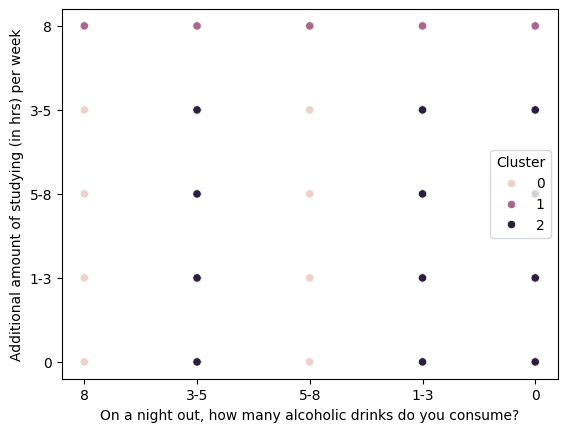

In [62]:
from sklearn.cluster import KMeans

# Define the features for clustering
features = data[['On a night out, how many alcoholic drinks do you consume?', 'Additional amount of studying (in hrs) per week']]

# Convert 'On a night out, how many alcoholic drinks do you consume?' to numeric
# Assuming the ranges represent an average, calculate the mid-point of the range
def convert_to_numeric(value):
  if isinstance(value, str) and '-' in value: # Check if the value is a string and contains '-'
    start, end = map(int, value.split('-'))
    return (start + end) / 2
  try:
    return float(value)
  except ValueError:
    return None # Handle cases with invalid values

# Apply the conversion to the correct column in features
features['On a night out, how many alcoholic drinks do you consume?'] = features['On a night out, how many alcoholic drinks do you consume?'].apply(convert_to_numeric)

# Instead of dropping rows, keep track of the original index
original_index = features.index

# Convert features to numeric values before fitting
# Use errors='coerce' to handle any remaining non-numeric values and fillna to replace NaN with 0
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

# Create a new Series for cluster labels with the original index
cluster_labels = pd.Series(kmeans.labels_, index=features.index)

# Reindex the cluster_labels Series to match the original_index
cluster_labels = cluster_labels.reindex(original_index)

# Add cluster labels to the data using the new Series
data['Cluster'] = cluster_labels

# Visualize the clusters
sns.scatterplot(x='On a night out, how many alcoholic drinks do you consume?', y='Additional amount of studying (in hrs) per week', hue='Cluster', data=data)
plt.show()



1.   There’s a significant spread of study hours across the clusters. Students who do not consume alcohol show a wide variation in study time, with several in Cluster 2 studying 0 hours and some in Cluster 0 studying as much as 8 hours per week.
2.   In this group, there is also a wide range of additional study hours, with many students in Cluster 1 studying between 1-8 hours. A few students in Cluster 2 show 0 study hours.
3.The majority of students consuming 3-5 drinks seem to study 0 additional hours per week and mostly belong to Cluster 2, which might indicate that this group spends little additional time on studying.
4.Similarly to the 3-5 drinks category, students consuming 5-8 drinks mostly study 0 hours, predominantly falling into Cluster 2.
5.Those who consume 8 or more drinks also show a range of study hours. A few students belong to Cluster 0, indicating they still study between 5-8 hours despite their higher alcohol consumption, while most belong to Cluster 2 and report 0 additional study hours.



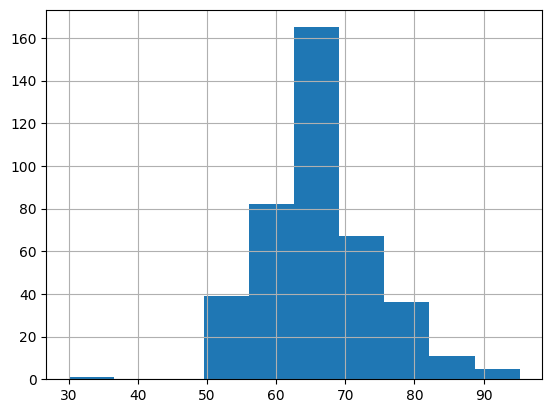

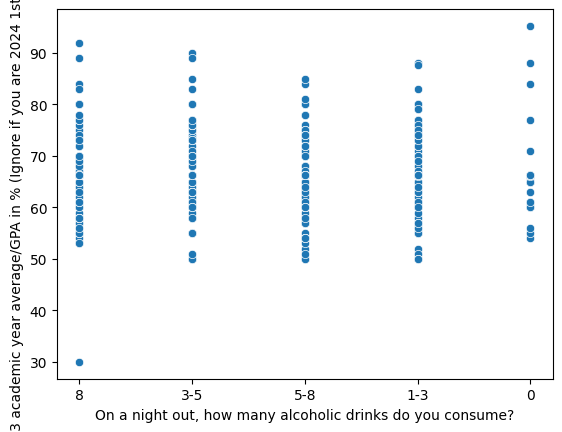

In [63]:
# Histogram of GPA
data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'].hist()
plt.show()

# Scatter plot of alcohol consumption vs. GPA
sns.scatterplot(x='On a night out, how many alcoholic drinks do you consume?', y='Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)', data=data) # Use the correct column name from the DataFrame
plt.show()



1.   Non-drinkers and light drinkers (0-3 drinks) tend to have a broad range of academic outcomes, with many students maintaining strong performance (70-90% GPA).

2.   Moderate to heavy drinkers (5-8+ drinks) seem to have a narrower range of performance, with more students concentrated around average GPAs (60-70%) and fewer students reaching the highest academic performance levels

3.   Heavy drinkers (8+ drinks) appear to be associated with generally lower academic performance, though this is not a strict rule since some students still perform well.







In [49]:
print(data.isnull().sum())
data.info()

Timestamp                                                                                            0
Your Sex?                                                                                            0
Your Matric (grade 12) Average/ GPA (in %)                                                           0
What year were you in last year (2023) ?                                                             0
What faculty does your degree fall under?                                                            0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   0
Your Accommodation Status Last Year (2023)                                                           0
Monthly Allowance in 2023                                                                            0
Were you on scholarship/bursary in 2023?                                                             0
Additional amount of studying (in hrs) per week                          

In [64]:
print(data.isnull().sum())
data.info()

Timestamp                                                                                            0
Your Sex?                                                                                            0
Your Matric (grade 12) Average/ GPA (in %)                                                           0
What year were you in last year (2023) ?                                                             0
What faculty does your degree fall under?                                                            0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   0
Your Accommodation Status Last Year (2023)                                                           0
Monthly Allowance in 2023                                                                            0
Were you on scholarship/bursary in 2023?                                                             0
Additional amount of studying (in hrs) per week                          